In [3]:
import numpy as np
import sympy
from sympy import symbols, Matrix
sympy.init_printing()
%matplotlib inline

For now, neglect rotational inertia.

## Interpolation functions

In [4]:
xi, l, rho = symbols('xi, l, rho')

# Shape functions
S = Matrix(np.zeros((4, 12)))
x2 = (1 - xi)
S[0, 0 ] =  x2                     # extension
S[0, 6 ] =  xi
S[1, 1 ] =  x2**2 * (3 - 2*x2)     # y-deflection
S[1, 7 ] =  xi**2 * (3 - 2*xi)
S[1, 5 ] = -x2**2 * (x2 - 1) * l  
S[1, 11] =  xi**2 * (xi - 1) * l  
S[2, 2 ] =  x2**2 * (3 - 2*x2)     # z-deflection
S[2, 8 ] =  xi**2 * (3 - 2*xi)
S[2, 4 ] =  x2**2 * (x2 - 1) * l
S[2, 10] = -xi**2 * (xi - 1) * l
S[3, 3 ] =  x2                     # torsion
S[3, 9 ] =  xi

#S[4, 2 ] =  6 * x2 * (x2 - 1) / l  # y-rotation
#S[4, 8 ] =  6 * xi * (xi - 1) / l
#S[4, 4 ] = -x2 * (3*x2 - 2)  
#S[4, 10] =  xi * (3*xi - 2)  
#S[5, 1 ] = -6 * x2 * (x2 - 1) / l  # z-rotation
#S[5, 7 ] = -6 * xi * (xi - 1) / l
#S[5, 5 ] =  x2 * (3*x2 - 2)  
#S[5, 11] =  xi * (3*xi - 2)  
S[:3, :].T

⎡1 - ξ         0.0                 0.0        ⎤
⎢                                             ⎥
⎢              2                              ⎥
⎢ 0.0   (1 - ξ) ⋅(2⋅ξ + 1)         0.0        ⎥
⎢                                             ⎥
⎢                                  2          ⎥
⎢ 0.0          0.0          (1 - ξ) ⋅(2⋅ξ + 1)⎥
⎢                                             ⎥
⎢ 0.0          0.0                 0.0        ⎥
⎢                                             ⎥
⎢                                         2   ⎥
⎢ 0.0          0.0            -l⋅ξ⋅(1 - ξ)    ⎥
⎢                                             ⎥
⎢                     2                       ⎥
⎢ 0.0      l⋅ξ⋅(1 - ξ)             0.0        ⎥
⎢                                             ⎥
⎢  ξ           0.0                 0.0        ⎥
⎢                                             ⎥
⎢           2                                 ⎥
⎢ 0.0      ξ ⋅(3 - 2⋅ξ)            0.0        ⎥
⎢                                       

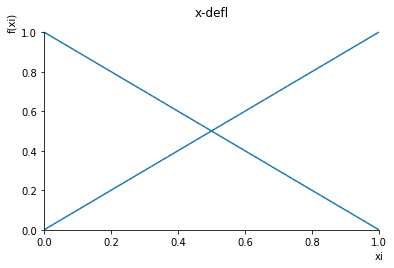

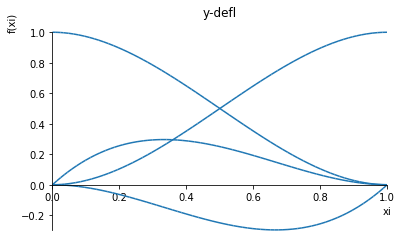

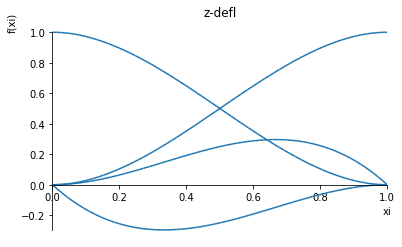

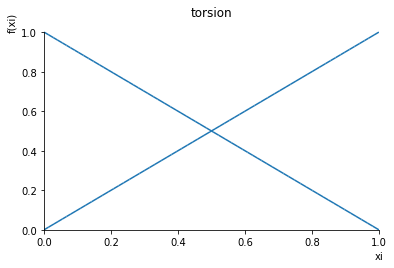

In [5]:
titles = ['x-defl', 'y-defl', 'z-defl', 'torsion']
for i in range(4):
    sympy.plot(*([xx.subs(l, 2) for xx in S[i,:] if xx != 0] + [(xi, 0, 1)]), 
               title=titles[i])

### Mass matrix

Define the density distribution (linear):

In [6]:
rho1, rho2 = symbols('rho_1, rho_2')
rho = (1 - xi)*rho1 + xi*rho2
rho

Integrate the density distribution with the shape functions.

In [7]:
def sym_me():
    m = Matrix(np.diag([rho, rho, rho, 0]))
    integrand = S.T * m * S
    me = integrand.applyfunc(
        lambda xxx: l * sympy.integrate(xxx, (xi, 0, 1)).expand().factor()
    )
    return me
me = sym_me()
me.shape

In [8]:
me[0,:]

⎡l⋅(3⋅ρ₁ + ρ₂)                 l⋅(ρ₁ + ρ₂)               ⎤
⎢─────────────  0  0  0  0  0  ───────────  0  0  0  0  0⎥
⎣      12                           12                   ⎦

In [9]:
me[6,:]

⎡l⋅(ρ₁ + ρ₂)                 l⋅(ρ₁ + 3⋅ρ₂)               ⎤
⎢───────────  0  0  0  0  0  ─────────────  0  0  0  0  0⎥
⎣     12                           12                    ⎦

In [10]:
me[1,:]

⎡                               2                                             
⎢   l⋅(10⋅ρ₁ + 3⋅ρ₂)           l ⋅(15⋅ρ₁ + 7⋅ρ₂)     9⋅l⋅(ρ₁ + ρ₂)           -
⎢0  ────────────────  0  0  0  ─────────────────  0  ─────────────  0  0  0  ─
⎣          35                         420                 140                 

 2               ⎤
l ⋅(7⋅ρ₁ + 6⋅ρ₂) ⎥
─────────────────⎥
      420        ⎦

Special case: rho1 == rho2

In [11]:
me.subs({rho2: rho1})/rho1

⎡l                                       l                                    
⎢─     0        0     0     0       0    ─     0        0     0    0       0  
⎢3                                       6                                    
⎢                                                                             
⎢                                     2                                      2
⎢    13⋅l                         11⋅l        9⋅l                       -13⋅l 
⎢0   ────       0     0     0     ─────  0    ───       0     0    0    ──────
⎢     35                           210         70                         420 
⎢                                                                             
⎢                             2                                      2        
⎢             13⋅l       -11⋅l                         9⋅l       13⋅l         
⎢0     0      ────    0  ───────    0    0     0       ───    0  ─────     0  
⎢              35          210                      

### Shape integrals

As well as the actual mass matrix, the shape integrals are needed for the multibody dynamics equations:

\begin{align}
m                   &= \int \mathrm{d}m      \\
\boldsymbol{S}      &= \int \boldsymbol{S} \mathrm{d}m  \\
\boldsymbol{S}_{kl} &= \int \boldsymbol{S}_k^T \boldsymbol{S}_l \mathrm{d}m
\end{align}
where $\boldsymbol{S}_k$ is the $k$th row of the element shape function.

The mass is the average density times the length:

In [12]:
mass = l * sympy.integrate(rho, (xi, 0, 1)).factor()
mass

First shape integral:

In [13]:
shape_integral_1 = S[:3, :].applyfunc(
    lambda xxx: l * sympy.integrate(rho * xxx, (xi, 0, 1)).expand().simplify()
)
shape_integral_1.T

⎡  ⎛ρ₁   ρ₂⎞                                        ⎤
⎢l⋅⎜── + ──⎟          0                   0         ⎥
⎢  ⎝3    6 ⎠                                        ⎥
⎢                                                   ⎥
⎢                ⎛7⋅ρ₁   3⋅ρ₂⎞                      ⎥
⎢     0        l⋅⎜──── + ────⎟            0         ⎥
⎢                ⎝ 20     20 ⎠                      ⎥
⎢                                                   ⎥
⎢                                    ⎛7⋅ρ₁   3⋅ρ₂⎞  ⎥
⎢     0               0            l⋅⎜──── + ────⎟  ⎥
⎢                                    ⎝ 20     20 ⎠  ⎥
⎢                                                   ⎥
⎢     0               0                   0         ⎥
⎢                                                   ⎥
⎢                                   2               ⎥
⎢                                 -l ⋅(3⋅ρ₁ + 2⋅ρ₂) ⎥
⎢     0               0           ──────────────────⎥
⎢                                         60        ⎥
⎢                           

In [14]:
shape_integral_2 = [
    [l * (S[i, :].T * S[j, :]).applyfunc(
        lambda xxx: sympy.integrate(rho * xxx, (xi, 0, 1)).expand().simplify())
     for j in range(3)]
    for i in range(3)
]

The mass matrix should be the same as the trace of the 2nd shape integrals:

In [15]:
(shape_integral_2[0][0] + shape_integral_2[1][1] + shape_integral_2[2][2] - me).expand()

⎡0  0  0  0  0  0  0  0  0  0  0  0⎤
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎢0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                  ⎥
⎣0  0  0  0  0  0  0  0  0  0  0  0⎦

### Stiffness matrix

Differentiate the shape functions:

In [16]:
B = Matrix(np.zeros((4, 12)))
B[0, :] = S[0, :].diff(xi, 1) / l
B[1, :] = S[1, :].diff(xi, 2) / l**2
B[2, :] = S[2, :].diff(xi, 2) / l**2
B[3, :] = S[3, :].diff(xi, 1) / l
B.simplify()

In [17]:
B[:, :6]

⎡-1                                                          ⎤
⎢───       0            0        0        0            0     ⎥
⎢ l                                                          ⎥
⎢                                                            ⎥
⎢     6⋅(2⋅ξ - 1)                                 2⋅(3⋅ξ - 2)⎥
⎢ 0   ───────────       0        0        0       ───────────⎥
⎢           2                                          l     ⎥
⎢          l                                                 ⎥
⎢                                                            ⎥
⎢                  6⋅(2⋅ξ - 1)       2⋅(2 - 3⋅ξ)             ⎥
⎢ 0        0       ───────────   0   ───────────       0     ⎥
⎢                        2                l                  ⎥
⎢                       l                                    ⎥
⎢                                                            ⎥
⎢                               -1                           ⎥
⎢ 0        0            0       ───       0            

In [18]:
B[:, 6:]

⎡1                                                       ⎤
⎢─       0            0       0       0            0     ⎥
⎢l                                                       ⎥
⎢                                                        ⎥
⎢   6⋅(1 - 2⋅ξ)                               2⋅(3⋅ξ - 1)⎥
⎢0  ───────────       0       0       0       ───────────⎥
⎢         2                                        l     ⎥
⎢        l                                               ⎥
⎢                                                        ⎥
⎢                6⋅(1 - 2⋅ξ)     2⋅(1 - 3⋅ξ)             ⎥
⎢0       0       ───────────  0  ───────────       0     ⎥
⎢                      2              l                  ⎥
⎢                     l                                  ⎥
⎢                                                        ⎥
⎢                             1                          ⎥
⎢0       0            0       ─       0            0     ⎥
⎣                             l                         

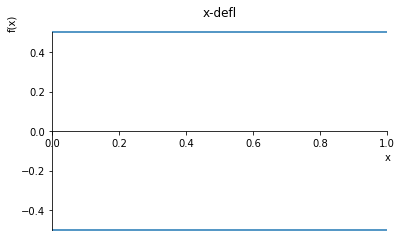

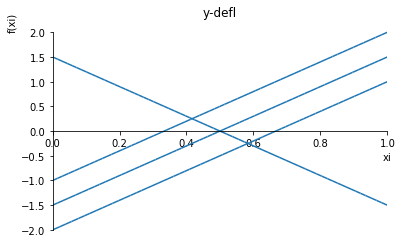

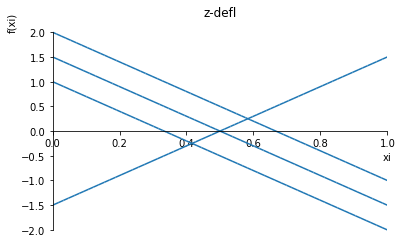

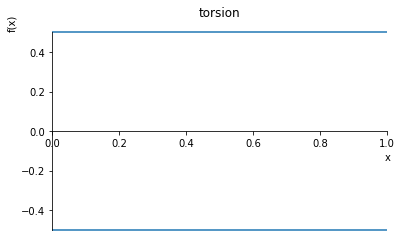

In [19]:
titles = ['x-defl', 'y-defl', 'z-defl', 'torsion']
for i in range(4):
    sympy.plot(*([xx.subs(l, 2) for xx in B[i,:] if xx != 0] + [(xi, 0, 1)]), 
               title=titles[i])

Define the stiffness distribution (linear):

In [20]:
EA1, EA2, EIy1, EIy2, EIz1, EIz2, GJ1, GJ2 = symbols('EA_1, EA_2, EIy_1, EIy_2, EIz_1, EIz_2, GJ_1, GJ_2')
EA  = (1 - xi)*EA1  + xi*EA2
EIy = (1 - xi)*EIy1 + xi*EIy2
EIz = (1 - xi)*EIz1 + xi*EIz2
GJ  = (1 - xi)*GJ1  + xi*GJ2
EA, EIy, EIz, GJ

Note that $EI_y$ refers to the stiffness for bending in the $y$-direction, not about the $y$ axis.

Try and simplify results by using the average values where they come up

In [21]:
Ex, Ey, Ez, Gx = symbols('E_x, E_y, E_z, G_x')

In [22]:
def sym_ke():
    # Note the order -- y deflections depend on EIz etc
    E = Matrix(np.diag([EA, EIz, EIy, GJ]))
    integrand = B.T * E * B
    ke = integrand.applyfunc(
        lambda xxx: l * sympy.integrate(xxx, (xi, 0, 1)).factor() #.subs((EA1+EA2), 2*Ex) #.expand().factor()
    )
    return ke
ke = sym_ke()

def simplify_ke(ke, EI=False):
    result = ke.applyfunc(
        lambda xxx: xxx.subs((EA1+EA2), 2*Ex).subs((GJ1+GJ2), 2*Gx))
    if EI:
        result = result.applyfunc(
            lambda xxx: xxx.subs((EIy1+EIy2), 2*Ey).subs((EIz1+EIz2), 2*Ez))
    return result
kem = simplify_ke(ke, True)

In [23]:
kem[:, :6]

⎡ Eₓ                                                                          
⎢ ──           0                   0            0             0               
⎢ l                                                                           
⎢                                                                             
⎢           12⋅E_z                                                         2⋅(
⎢ 0         ──────                 0            0             0            ───
⎢              3                                                              
⎢             l                                                               
⎢                                                                             
⎢                               12⋅E_y               -2⋅(2⋅EIy₁ + EIy₂)       
⎢ 0            0                ──────          0    ───────────────────      
⎢                                  3                           2              
⎢                                 l                 

In [24]:
kem[:, 6:]

⎡-Eₓ                                                                          
⎢────           0                   0           0             0               
⎢ l                                                                           
⎢                                                                             
⎢           -12⋅E_z                                                        2⋅(
⎢ 0         ────────                0           0             0            ───
⎢               3                                                             
⎢              l                                                              
⎢                                                                             
⎢                               -12⋅E_y              -2⋅(EIy₁ + 2⋅EIy₂)       
⎢ 0             0               ────────        0    ───────────────────      
⎢                                   3                          2              
⎢                                  l                

Special case: uniform stiffness.

In [25]:
kem.subs({EA1: Ex, EA2: Ex, EIy1: Ey, EIy2: Ey, EIz1: Ez, EIz2: Ez})

⎡ Eₓ                                               -Eₓ                        
⎢ ──      0         0       0       0        0     ────     0         0       
⎢ l                                                 l                         
⎢                                                                             
⎢       12⋅E_z                             6⋅E_z         -12⋅E_z              
⎢ 0     ──────      0       0       0      ─────    0    ────────     0       
⎢          3                                  2              3                
⎢         l                                  l              l                 
⎢                                                                             
⎢                 12⋅E_y         -6⋅E_y                            -12⋅E_y    
⎢ 0       0       ──────    0    ───────     0      0       0      ────────   
⎢                    3               2                                 3      
⎢                   l               l               

This is the same as Rao2004 p.326

## Stress stiffening

Now derive the stress stiffening (e.g. centrifugal stiffening) matrix. Ref Cook1989.

Need the matrix $\boldsymbol{G}$ such that
$$
\begin{bmatrix} u_{,x} \\ v_{,x} \\ w_{,x} \\ \end{bmatrix} = \boldsymbol{Gq}
$$

In [26]:
# G = Matrix(np.zeros((3, 12)))
# G[0, :] = S[0, :].diff(xi, 1) / l
# G[1, :] = S[1, :].diff(xi, 1) / l
# G[2, :] = S[2, :].diff(xi, 1) / l
G = S[:3, :].diff(xi, 1) / l
G.simplify()
G[:, :6]

⎡-1                                                                    ⎤
⎢───       0            0       0          0                  0        ⎥
⎢ l                                                                    ⎥
⎢                                                                      ⎥
⎢     6⋅ξ⋅(ξ - 1)                                                      ⎥
⎢ 0   ───────────       0       0          0          (ξ - 1)⋅(3⋅ξ - 1)⎥
⎢          l                                                           ⎥
⎢                                                                      ⎥
⎢                  6⋅ξ⋅(ξ - 1)                                         ⎥
⎢ 0        0       ───────────  0  (1 - 3⋅ξ)⋅(ξ - 1)          0        ⎥
⎣                       l                                              ⎦

In [27]:
G[:, 6:]

⎡1                                                       ⎤
⎢─       0            0       0       0            0     ⎥
⎢l                                                       ⎥
⎢                                                        ⎥
⎢   6⋅ξ⋅(1 - ξ)                                          ⎥
⎢0  ───────────       0       0       0       ξ⋅(3⋅ξ - 2)⎥
⎢        l                                               ⎥
⎢                                                        ⎥
⎢                6⋅ξ⋅(1 - ξ)                             ⎥
⎢0       0       ───────────  0  ξ⋅(2 - 3⋅ξ)       0     ⎥
⎣                     l                                  ⎦

In [28]:
def sym_ks_axial_force():
    # Unit axial force (absorbing area from integral), block matrix 3 times
    #smat3 = Matrix(9, 9, lambda i, j: 1 if i == j and i % 3 == 0 else 0)
    #integrand = G.T * smat3 * G
    integrand = G.T * G
    ks = integrand.applyfunc(
        lambda xxx: l * sympy.integrate(xxx, (xi, 0, 1)).factor() #.subs((EA1+EA2), 2*Ex) #.expand().factor()
    )
    return ks
ks = sym_ks_axial_force()

In [29]:
ks * 30*l

⎡30    0    0    0   0     0    -30   0     0   0   0     0  ⎤
⎢                                                            ⎥
⎢ 0   36    0    0   0    3⋅l    0   -36    0   0   0    3⋅l ⎥
⎢                                                            ⎥
⎢ 0    0    36   0  -3⋅l   0     0    0    -36  0  -3⋅l   0  ⎥
⎢                                                            ⎥
⎢ 0    0    0    0   0     0     0    0     0   0   0     0  ⎥
⎢                                                            ⎥
⎢                      2                             2       ⎥
⎢ 0    0   -3⋅l  0  4⋅l    0     0    0    3⋅l  0  -l     0  ⎥
⎢                                                            ⎥
⎢                            2                             2 ⎥
⎢ 0   3⋅l   0    0   0    4⋅l    0   -3⋅l   0   0   0    -l  ⎥
⎢                                                            ⎥
⎢-30   0    0    0   0     0    30    0     0   0   0     0  ⎥
⎢                                                      

This agrees with Cook1989, p.434, for the transverse directions. 

## Generalised forces

Define the force distribution (linear):

In [30]:
fx1, fx2, fy1, fy2, fz1, fz2 = symbols('f_x1, f_x2, f_y1, f_y2, f_z1, f_z2')
fx = (1 - xi)*fx1 + xi*fx2
fy = (1 - xi)*fy1 + xi*fy2
fz = (1 - xi)*fz1 + xi*fz2
f = Matrix([fx, fy, fz])
f

⎡ fₓ₁⋅(1 - ξ) + fₓ₂⋅ξ ⎤
⎢                     ⎥
⎢f_y1⋅(1 - ξ) + f_y2⋅ξ⎥
⎢                     ⎥
⎣f_z1⋅(1 - ξ) + f_z2⋅ξ⎦

In [31]:
# Shape functions for applied force -- linear
SF = Matrix(np.zeros((3, 12)))
SF[0, 0 ] =  x2                     # x
SF[0, 6 ] =  xi
SF[1, 1 ] =  x2                     # y
SF[1, 7 ] =  xi
SF[2, 2 ] =  x2                     # z
SF[2, 8 ] =  xi
SF

⎡1 - ξ   0.0    0.0   0.0  0.0  0.0   ξ   0.0  0.0  0.0  0.0  0.0⎤
⎢                                                                ⎥
⎢ 0.0   1 - ξ   0.0   0.0  0.0  0.0  0.0   ξ   0.0  0.0  0.0  0.0⎥
⎢                                                                ⎥
⎣ 0.0    0.0   1 - ξ  0.0  0.0  0.0  0.0  0.0   ξ   0.0  0.0  0.0⎦

First shape integral for applied forces:

In [32]:
shape_integral_F1 = SF.applyfunc(
    lambda xxx: l * sympy.integrate(xxx, (xi, 0, 1)).expand().simplify()
)
shape_integral_F1

⎡l                 l               ⎤
⎢─  0  0  0  0  0  ─  0  0  0  0  0⎥
⎢2                 2               ⎥
⎢                                  ⎥
⎢   l                 l            ⎥
⎢0  ─  0  0  0  0  0  ─  0  0  0  0⎥
⎢   2                 2            ⎥
⎢                                  ⎥
⎢      l                 l         ⎥
⎢0  0  ─  0  0  0  0  0  ─  0  0  0⎥
⎣      2                 2         ⎦

Second shape integral for applied forces:

In [33]:
shape_integral_F2 = [
    [l * (S[i, :].T * SF[j, :]).applyfunc(
        lambda xxx: sympy.integrate(xxx, (xi, 0, 1)).expand().simplify())
     for j in range(3)]
    for i in range(3)
]

The generalised nodal forces are given by the trace of this (the other parts of it are used to find the moments on the whole body directly...):

In [34]:
F = shape_integral_F2[0][0] + shape_integral_F2[1][1] + shape_integral_F2[2][2]

Special case -- constant force:

In [35]:
F * Matrix([fx1, fy1, fz1, 0, 0, 0, fx1, fy1, fz1, 0, 0, 0])

⎡  fₓ₁⋅l  ⎤
⎢  ─────  ⎥
⎢    2    ⎥
⎢         ⎥
⎢ f_y1⋅l  ⎥
⎢ ──────  ⎥
⎢   2     ⎥
⎢         ⎥
⎢ f_z1⋅l  ⎥
⎢ ──────  ⎥
⎢   2     ⎥
⎢         ⎥
⎢    0    ⎥
⎢         ⎥
⎢       2 ⎥
⎢-f_z1⋅l  ⎥
⎢─────────⎥
⎢    12   ⎥
⎢         ⎥
⎢       2 ⎥
⎢ f_y1⋅l  ⎥
⎢ ─────── ⎥
⎢    12   ⎥
⎢         ⎥
⎢  fₓ₁⋅l  ⎥
⎢  ─────  ⎥
⎢    2    ⎥
⎢         ⎥
⎢ f_y1⋅l  ⎥
⎢ ──────  ⎥
⎢   2     ⎥
⎢         ⎥
⎢ f_z1⋅l  ⎥
⎢ ──────  ⎥
⎢   2     ⎥
⎢         ⎥
⎢    0    ⎥
⎢         ⎥
⎢       2 ⎥
⎢ f_z1⋅l  ⎥
⎢ ─────── ⎥
⎢    12   ⎥
⎢         ⎥
⎢       2 ⎥
⎢-f_y1⋅l  ⎥
⎢─────────⎥
⎣    12   ⎦

Another example -- a uniform distributed force in the z direction:

In [36]:
F * Matrix([0, 0, fz1, 0, 0, 0, 0, 0, fz1, 0, 0, 0]) / (l/12*fz1)

⎡0 ⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢6 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢-l⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢6 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢l ⎥
⎢  ⎥
⎣0 ⎦

## Output

Write a Python file with functions to calculate all of these:

In [37]:
def numpy_array_str(expr):
    return str(expr) \
        .replace('Matrix([', 'array([\n') \
        .replace('], [', '],\n[') \
        .replace(']])', ']\n])')
        
def numpy_array_str_2x2(arr):
    return ',\n'.join(['[{}]'.format(',\n'.join([numpy_array_str(arr[i][j])
                                                 for j in range(3)]))
                        for i in range(3)])

In [39]:
import datetime

code = """
# Automatically generated from SymPy in notebook
# {date}

from __future__ import division
from numpy import array

def mass(l, rho_1, rho_2):
    return {mass}
    
def S1(l, rho_1, rho_2):
    return {S1}
    
def S2(l, rho_1, rho_2):
    return [
        {S2}
    ]
    
def K(l, E_x, G_x, EIy_1, EIy_2, EIz_1, EIz_2):
    return {K}
    
def Ks(l):
    return {Ks}
    
def F1(l):
    return {F1}
    
def F2(l):
    return [
        {F2}
    ]
    
""".format(
    date=datetime.datetime.now(),
    mass=mass,
    S1=numpy_array_str(shape_integral_1),
    S2=numpy_array_str_2x2(shape_integral_2),
    K=numpy_array_str(simplify_ke(ke)),
    Ks=numpy_array_str(ks),
    F1=numpy_array_str(shape_integral_F1),
    F2=numpy_array_str_2x2(shape_integral_F2)
)

with open('tapered_beam_element_integrals.py', 'wt') as f:
    f.write(code)